# Sklearn_basic Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
#meta_feature = pd.read_csv('meta_feature.csv')

In [2]:
#train = train.merge(meta_feature, on='id', how='left')
#test = test.merge(meta_feature, on='id', how='left')

## Data Preparation


In [3]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [4]:
train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Stratified Train/Test Split

Stratification is necessary for this dataset because there is a relatively large number of classes (100 classes for 990 samples). This will ensure we have all classes represented in both the train and test indices. 

In [5]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

## Standard Normalization

In [6]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Sklearn Classifier Showdown

Simply looping through 10 out-of-the box classifiers and printing the results. Obviously, these will perform much better after tuning their hyperparameters, but this gives you a decent ballpark idea. 

In [7]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)


KNeighborsClassifier
****Results****
Accuracy: 96.9697%
Log Loss: 0.23699365998
SVC
****Results****
Accuracy: 98.4848%
Log Loss: 4.63342716076
NuSVC
****Results****
Accuracy: 98.9899%
Log Loss: 2.37470986564
DecisionTreeClassifier
****Results****
Accuracy: 65.1515%
Log Loss: 12.0362402588
RandomForestClassifier
****Results****
Accuracy: 86.8687%
Log Loss: 1.00391370117
AdaBoostClassifier
****Results****
Accuracy: 4.0404%
Log Loss: 4.20721577649
GradientBoostingClassifier
****Results****
Accuracy: 58.0808%
Log Loss: 2.53653548686
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.8272554667
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.9798%
Log Loss: 0.930197776314
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 5.0505%
Log Loss: 32.7943937487


/usr/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:523: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


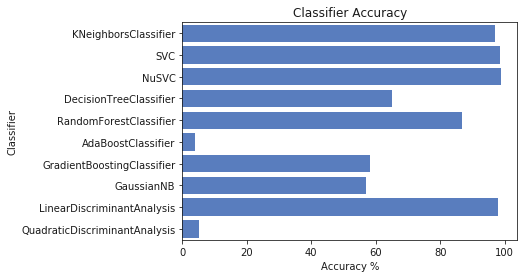

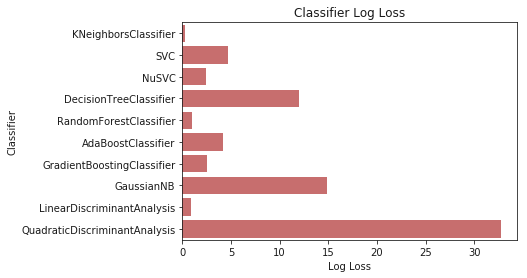

In [8]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Reduce feature dimension - LDA method 192 -> 92 dim

In [9]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [10]:
LDA_X_train = lda.transform(X_train)
LDA_X_test = lda.transform(X_test)
#clf.fit(new_X_train, y_train)

In [11]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(LDA_X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(LDA_X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(LDA_X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 97.9798%
Log Loss: 0.199275119663
SVC
****Results****
Accuracy: 86.3636%
Log Loss: 4.60827692303
NuSVC
****Results****
Accuracy: 89.8990%
Log Loss: 3.11771817439
DecisionTreeClassifier
****Results****
Accuracy: 58.5859%
Log Loss: 14.3039376989
RandomForestClassifier
****Results****
Accuracy: 77.2727%
Log Loss: 2.85116951867
AdaBoostClassifier
****Results****
Accuracy: 7.0707%
Log Loss: 4.50297811263
GradientBoostingClassifier
****Results****
Accuracy: 38.8889%
Log Loss: 4.68801644815
GaussianNB
****Results****
Accuracy: 97.4747%
Log Loss: 0.636210329232
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.9798%
Log Loss: 0.930197776314
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 3.0303%
Log Loss: 33.4921468072


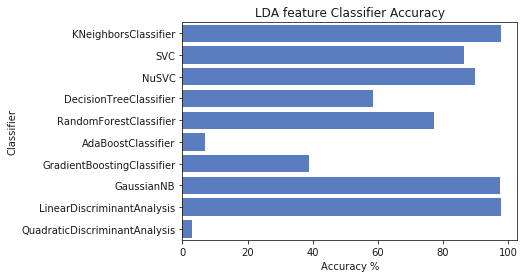

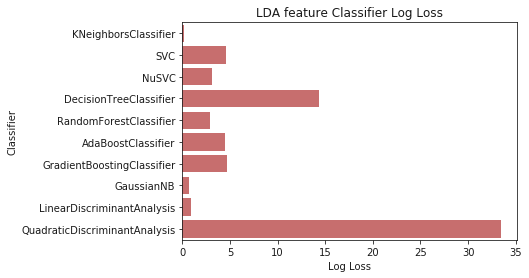

In [12]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('LDA feature Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('LDA feature Classifier Log Loss')
plt.show()

## Reduce feature dimension - PCA method 192 -> 92 dim

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=92)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

In [14]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(pca_X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(pca_X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(pca_X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 96.9697%
Log Loss: 0.23699365998
SVC
****Results****
Accuracy: 98.9899%
Log Loss: 4.67885678426
NuSVC
****Results****
Accuracy: 98.4848%
Log Loss: 2.31506744129
DecisionTreeClassifier
****Results****
Accuracy: 62.6263%
Log Loss: 12.9084315819
RandomForestClassifier
****Results****
Accuracy: 80.8081%
Log Loss: 2.49379621578
AdaBoostClassifier
****Results****
Accuracy: 3.0303%
Log Loss: 4.424901666
GradientBoostingClassifier
****Results****
Accuracy: 51.0101%
Log Loss: 3.17367845447
GaussianNB
****Results****
Accuracy: 97.9798%
Log Loss: 0.46426635819
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.9899%
Log Loss: 1.12499850133
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 9.5960%
Log Loss: 31.2244493671


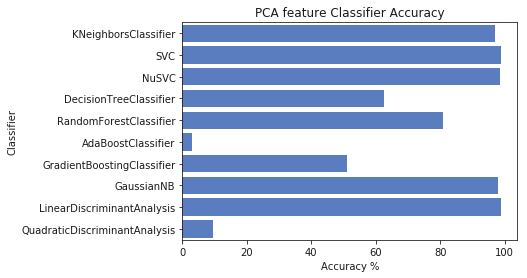

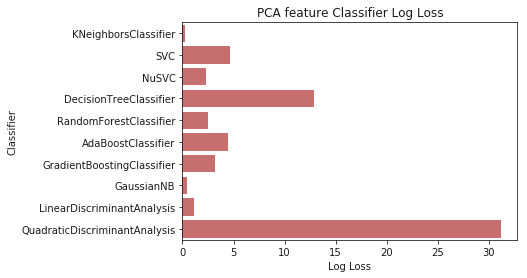

In [15]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('PCA feature Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('PCA feature Classifier Log Loss')
plt.show()

## Reduce feature dimension - Decision Tree method 192 -> 92 dim

In [16]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
important = tree.feature_importances_
important = np.argsort(important)[:92]

In [17]:
tree_X_train = X_train[:, important]
tree_X_test = X_test[:, important]

In [18]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(tree_X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(tree_X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(tree_X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 94.4444%
Log Loss: 0.642282173852
SVC
****Results****
Accuracy: 94.9495%
Log Loss: 4.63221761364
NuSVC
****Results****
Accuracy: 96.9697%
Log Loss: 2.36599310198
DecisionTreeClassifier
****Results****
Accuracy: 67.1717%
Log Loss: 11.3384872003
RandomForestClassifier
****Results****
Accuracy: 82.8283%
Log Loss: 1.74258679578
AdaBoostClassifier
****Results****
Accuracy: 2.0202%
Log Loss: 4.66856711813
GradientBoostingClassifier
****Results****
Accuracy: 52.5253%
Log Loss: 2.82186937934
GaussianNB
****Results****
Accuracy: 68.1818%
Log Loss: 10.8915561165
LinearDiscriminantAnalysis
****Results****
Accuracy: 96.4646%
Log Loss: 1.34094733412
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 3.5354%
Log Loss: 33.3177085426


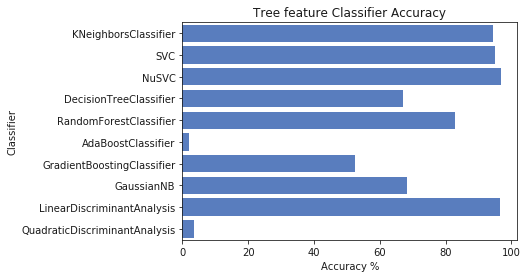

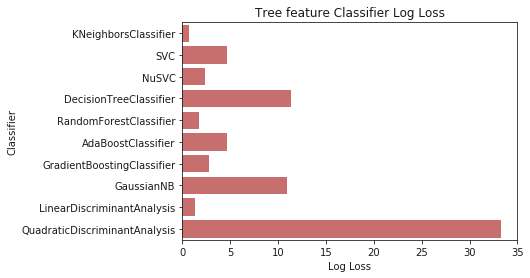

In [19]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Tree feature Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Tree feature Classifier Log Loss')
plt.show()

|Accuracy (%) | KNN | SVC | NuSVC |  D-Tree | RForest | AdaBoost | GBoost | NB | LDA | QDA |
| -: |-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Defualt | 96.96 | 98.48 | 98.98 | 62.62 | 87.87 | 4.54 | 57.57 | 57.07 | 97.97 | 5.05| 
| LDA| 97.97 | 86.36 | 89.89 | 53.03 | 78.78 | 7.57 | 39.39 | 97.47 | 97.97 | 3.03| 
| PCA | 96.96 | 98.48 | 98.48 | 62.12 | 81.81 | 3.03 | 53.03 | 96.96 | 98.98 | 9.59| 
| Tree | 94.44 | 94.94 | 96.96 | 62.62 | 84.34 | 2.52 | 48.48 | 49.49 | 96.46 | 4.04 |


## To do list
- KNN fine tuning

In [23]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'weights': ['uniform','distance'], 'n_neighbors': [3,5,10]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'n_neighbors': 3, 'weights': 'distance'}
